In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque



Solution found:
Step 0: Left(M:3,C:3) | Boat:Left | Right(M:0,C:0)
Step 1: Left(M:3,C:1) | Boat:Right | Right(M:0,C:2)
Step 2: Left(M:3,C:2) | Boat:Left | Right(M:0,C:1)
Step 3: Left(M:3,C:0) | Boat:Right | Right(M:0,C:3)
Step 4: Left(M:3,C:1) | Boat:Left | Right(M:0,C:2)
Step 5: Left(M:1,C:1) | Boat:Right | Right(M:2,C:2)
Step 6: Left(M:2,C:2) | Boat:Left | Right(M:1,C:1)
Step 7: Left(M:0,C:2) | Boat:Right | Right(M:3,C:1)
Step 8: Left(M:0,C:3) | Boat:Left | Right(M:3,C:0)
Step 9: Left(M:0,C:1) | Boat:Right | Right(M:3,C:2)
Step 10: Left(M:1,C:1) | Boat:Left | Right(M:2,C:2)
Step 11: Left(M:0,C:0) | Boat:Right | Right(M:3,C:3)


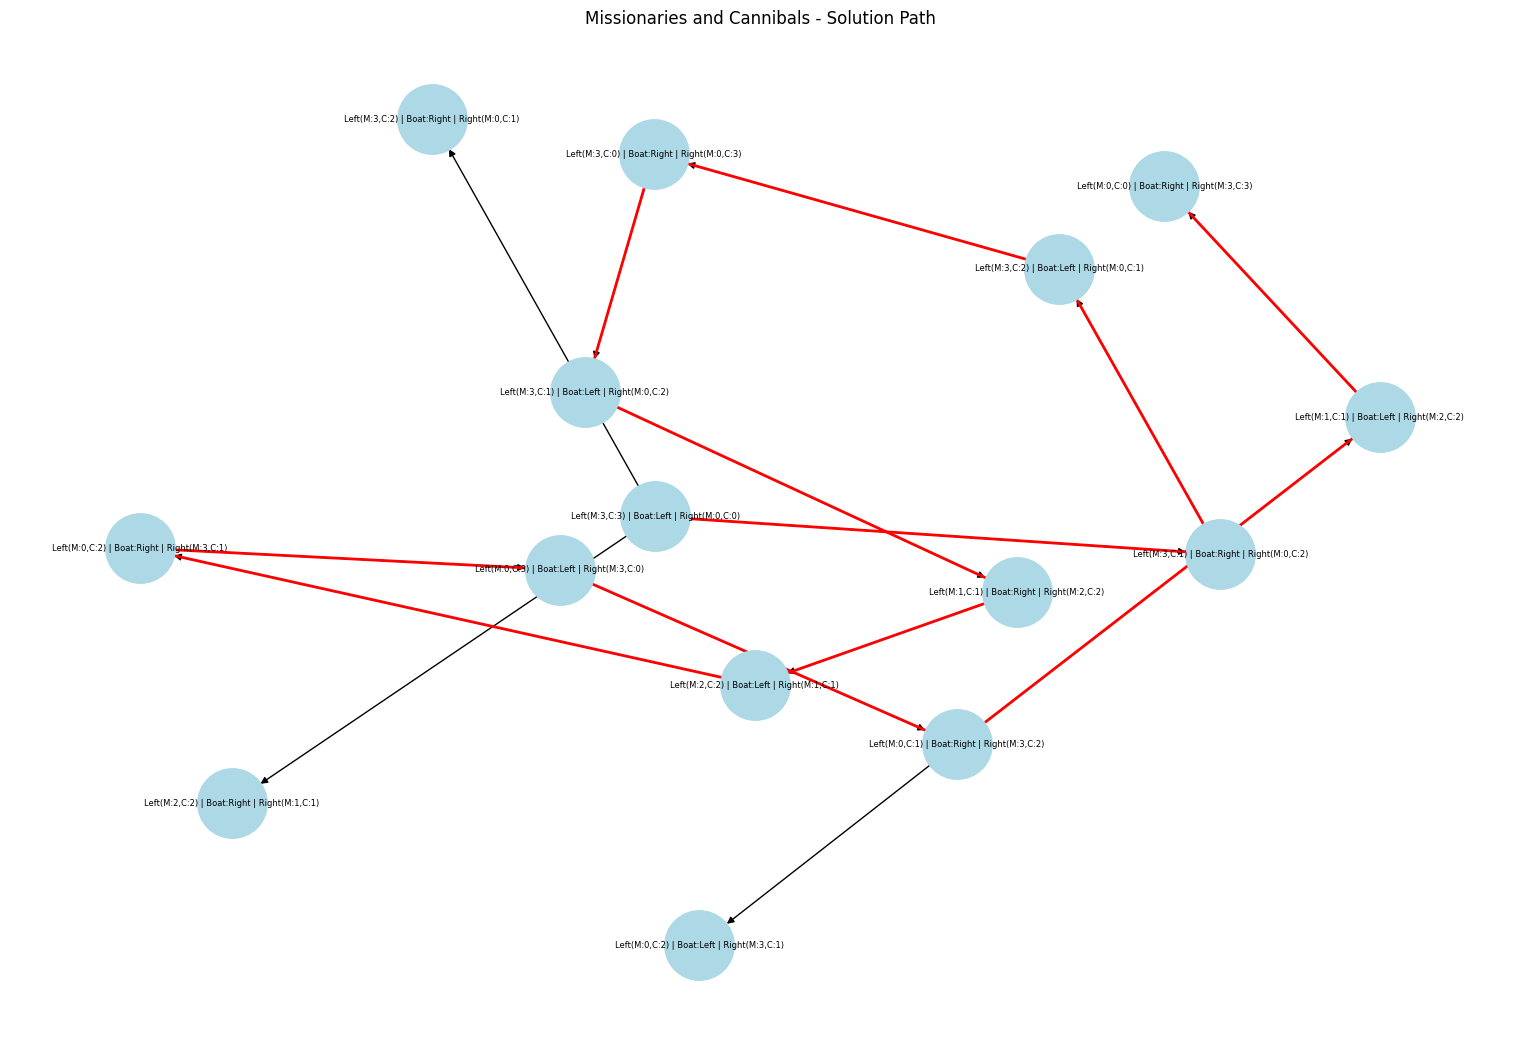

In [4]:
class MissionariesCannibalsState:
    def __init__(self, m_left, c_left, boat_on_left, m_right, c_right):
        self.m_left = m_left
        self.c_left = c_left
        self.boat_on_left = boat_on_left
        self.m_right = m_right
        self.c_right = c_right
    
    def is_valid(self):
        if (self.m_left < 0 or self.c_left < 0 or 
            self.m_right < 0 or self.c_right < 0):
            return False
            
        if (self.m_left > 0 and self.m_left < self.c_left) or \
           (self.m_right > 0 and self.m_right < self.c_right):
            return False
            
        return True
    
    def is_goal(self):
        return (self.m_left == 0 and self.c_left == 0 and 
                not self.boat_on_left)
    
    def __eq__(self, other):
        return (self.m_left == other.m_left and 
                self.c_left == other.c_left and 
                self.boat_on_left == other.boat_on_left)
    
    def __hash__(self):
        return hash((self.m_left, self.c_left, self.boat_on_left))
    
    def __str__(self):
        left = f"Left(M:{self.m_left},C:{self.c_left})"
        right = f"Right(M:{self.m_right},C:{self.c_right})"
        boat = "Left" if self.boat_on_left else "Right"
        return f"{left} | Boat:{boat} | {right}"

class MissionariesCannibalsSolver:
    def __init__(self):
        self.total_missionaries = 3
        self.total_cannibals = 3
        self.graph = nx.DiGraph()
        
    def get_next_states(self, state):
        next_states = []
        # All possible combinations of missionaries and cannibals in boat
        moves = [(1,0), (2,0), (0,1), (0,2), (1,1)]
        
        for m, c in moves:
            if state.boat_on_left:
                new_state = MissionariesCannibalsState(
                    state.m_left - m,
                    state.c_left - c,
                    False,
                    state.m_right + m,
                    state.c_right + c
                )
            else:
                new_state = MissionariesCannibalsState(
                    state.m_left + m,
                    state.c_left + c,
                    True,
                    state.m_right - m,
                    state.c_right - c
                )
            
            if new_state.is_valid():
                next_states.append(new_state)
        
        return next_states
    
    def solve(self):
        initial_state = MissionariesCannibalsState(
            self.total_missionaries,
            self.total_cannibals,
            True,
            0,
            0
        )
        
        queue = deque([(initial_state, [initial_state])])
        visited = {initial_state}
        
        while queue:
            current_state, path = queue.popleft()
            
            if current_state.is_goal():
                return path
            
            for next_state in self.get_next_states(current_state):
                if next_state not in visited:
                    visited.add(next_state)
                    new_path = path + [next_state]
                    queue.append((next_state, new_path))
                    self.graph.add_edge(str(current_state), str(next_state))
        
        return None

    def visualize_solution(self, path):
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(self.graph, k=1, iterations=50)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue',
                node_size=2500, font_size=6, arrows=True)
        
        # Highlight solution path
        path_edges = list(zip(map(str, path[:-1]), map(str, path[1:])))
        nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges,
                             edge_color='r', width=2)
        
        plt.title("Missionaries and Cannibals - Solution Path")
        plt.show()

def solve_missionaries_cannibals():
    solver = MissionariesCannibalsSolver()
    solution = solver.solve()
    
    if solution:
        print("\nSolution found:")
        for step, state in enumerate(solution):
            print(f"Step {step}: {state}")
        solver.visualize_solution(solution)
    else:
        print("No solution found!")

if __name__ == "__main__":
    solve_missionaries_cannibals()